In [ ]:
from datetime import datetime
import pandas as pd
import requests

d = {'Accept': 'application/json, text/plain, */*',
 'Channel-Name': 'webpublic',
 'X-San-Segment-Id': '2'}
result = requests.get('https://www.santander.com.ar/fondosInformacion/funds?currency=ARS', headers=d).json()

data = result['data']

df = pd.read_excel(data['historyFile'])
df.columns = df.iloc[4]
df = df[5:]


df = df[df.FECHA > datetime(2024,1,1)]
df = df.set_index('FECHA')

In [ ]:
import re

def normalize(s):
    return re.sub(r'\(.*?\)', '', s.upper()).replace('SUPERFONDO', '').strip()

data_by_name = {}

for tier in data['fundsByRisk']:
    for e in tier['funds']:
        data_by_name[e['name']] = {
            'Variacion ultimo dia': e['periods']['lastDay'], 
            'Variacion ultima semana': e['periods']['last7Days']
        }
        

# Graficos historicos

que se actualizan cuando a Santander se le canta :P

,Super Ahorro $
Variacion ultimo dia,0.20%
Variacion ultima semana,1.64%


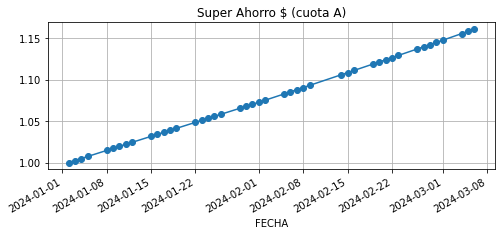

,Super Ahorro Plus
Variacion ultimo dia,0.19%
Variacion ultima semana,1.67%


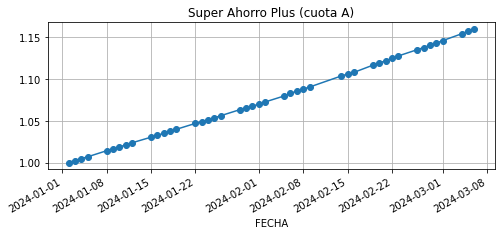

,Supergestión MIX VI
Variacion ultimo dia,0.30%
Variacion ultima semana,2.30%


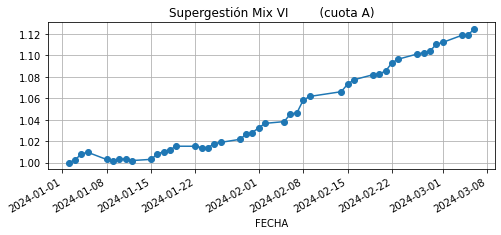

,Superfondo Renta $
Variacion ultimo dia,-0.25%
Variacion ultima semana,4.64%


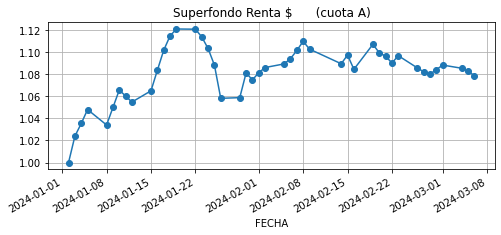

,Superfondo Renta Fija
Variacion ultimo dia,-0.05%
Variacion ultima semana,6.15%


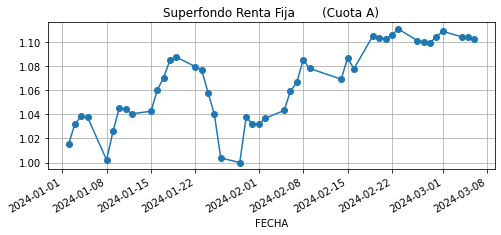

,Super Bonos
Variacion ultimo dia,0.35%
Variacion ultima semana,2.20%


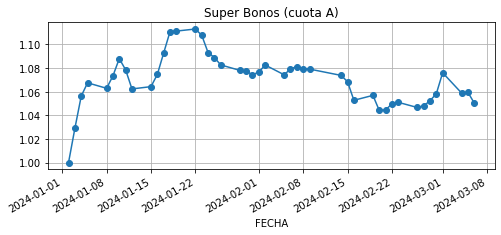

,Superfondo Combinado
Variacion ultimo dia,0.07%
Variacion ultima semana,3.39%


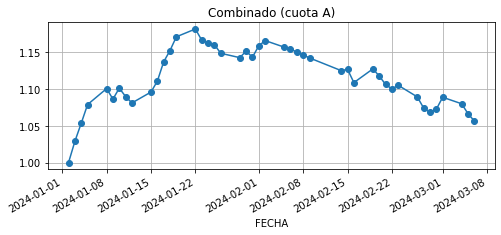

,Supergestión
Variacion ultimo dia,0.17%
Variacion ultima semana,3.61%


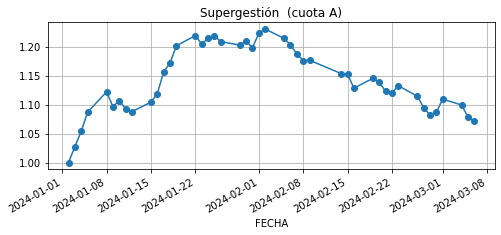

,Superfondo Acciones
Variacion ultimo dia,2.24%
Variacion ultima semana,6.18%


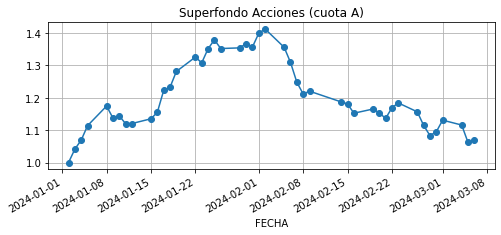

,Superfondo Renta Variable
Variacion ultimo dia,2.60%
Variacion ultima semana,5.18%


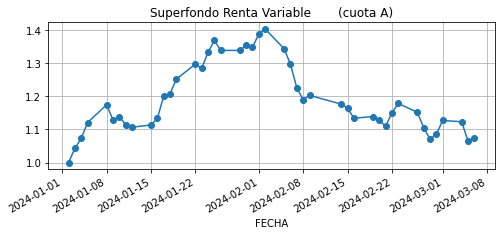

,Superfondo Renta Fija
Variacion ultimo dia,-0.05%
Variacion ultima semana,6.15%


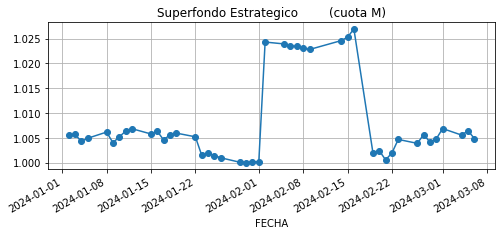

In [4]:
import matplotlib.pyplot as plt
import Levenshtein
from IPython.display import display_markdown, Markdown, display
from itertools import chain

# display_markdown(Markdown('# Tablas con información de hoy'))
# for tier in data['fundsByRisk']:
#     display_markdown(Markdown('### Riesgo ' + tier['risk']))
#     display(pd.DataFrame(
#         [{'Nombre': e['name'], 'Variacion ultimo dia': e['periods']['lastDay']} for e in tier['funds']]
#     ).sort_values('Variacion ultimo dia', ascending=False))
    

display_markdown(Markdown('# Graficos historicos'))
display_markdown(Markdown('que se actualizan cuando a Santander se le canta :P'))

for c in df.columns:
    match = min(data_by_name, key=lambda x: Levenshtein.distance(normalize(x), normalize(c)))
#     print(c, normalize(c), '->', match, Levenshtein.distance(match, normalize(c)))
    doc = data_by_name[match].copy()
#     doc['Nombre del fondo utilizado para el el grafico'] = c
#     doc['Nombre del fondo utilizaInformacion de esta tabla'] = match
    display(pd.DataFrame({match:pd.Series(doc)}))
    
    plt.figure(figsize=(8,3))
    (df[c] / df[c].min()).plot(marker='o')
    plt.title(c)
    plt.grid()
    plt.show()
#     plt.savefig(c + '.png')